## Load In Dependencies

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import folium

# Data Science
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Multi-dimensional arrays and datasets
import xarray as xr

# Geospatial raster data handling
import rioxarray as rxr

# Geospatial data analysis
import geopandas as gpd

# Geospatial operations
import rasterio
from rasterio import windows  
from rasterio import features  
from rasterio import warp
from rasterio.warp import transform_bounds 
from rasterio.windows import from_bounds 

# Image Processing
from PIL import Image

# Coordinate transformations
from pyproj import Proj, Transformer, CRS

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Planetary Computer Tools
import pystac_client
import planetary_computer as pc
from pystac.extensions.eo import EOExtension as eo

# Others
import os
from tqdm import tqdm
import sys

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.mixture import GaussianMixture


In [299]:
sys.path.append(os.path.abspath("../ml_pipeline"))
import ml_models
save_folder = "../ml_pipeline/diagnostic_data/"

In [2]:
# Load the training data from csv file and display the first few rows to inspect the data
ground_df = pd.read_csv("../Training_data_uhi_index_2025-02-18.csv")
ground_df.head()

Longitude   Latitude          datetime  UHI Index
0 -73.909167  40.813107  24-07-2021 15:53   1.030289
1 -73.909187  40.813045  24-07-2021 15:53   1.030289
2 -73.909215  40.812978  24-07-2021 15:53   1.023798
3 -73.909242  40.812908  24-07-2021 15:53   1.023798
4 -73.909257  40.812845  24-07-2021 15:53   1.021634

In [3]:
data_folder = "../data_pipeline/data/tabular_data/train/1x1"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

data_folder = "../data_pipeline/data/tabular_data/train/3x3"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

data_folder = "../data_pipeline/data/tabular_data/train/5x5"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

data_folder = "../data_pipeline/data/tabular_data/train/9x9"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

data_folder = "../data_pipeline/data/tabular_data/train/15x15"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/train/25x25"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/train/51x51"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        ground_df = pd.concat([ground_df, df], axis=1)

0it [00:00, ?it/s]

40it [00:01, 22.17it/s]
73it [00:07, 10.27it/s]
71it [00:10,  6.55it/s]
71it [00:15,  4.47it/s]
63it [00:18,  3.50it/s]
29it [00:09,  3.11it/s]
29it [00:12,  2.32it/s]


In [7]:
list(ground_df.columns)

['Longitude',
 'Latitude',
 'datetime',
 'UHI Index',
 'aod47',
 'aod55',
 'building_height_res100',
 'building_height_std_res100',
 'building_year_res100',
 'building_area_res100',
 'building_height_res30',
 'building_height_std_res30',
 'building_year_res30',
 'building_area_res30',
 'var_res100',
 'building_area_per_pixel_res100',
 'var_res30',
 'building_area_per_pixel_res30',
 'Unnamed: 4',
 'canopy_heigth',
 'canopy_heigth_res10',
 'canopy_heigth_count_res10',
 'canopy_heigth_res30',
 'canopy_heigth_count_res30',
 'canopy_heigth_res5',
 'canopy_heigth_count_res5',
 'co_july24',
 'segment_avg_length_res100',
 'segment_count_res100',
 'segment_total_length_res100',
 'degree_orientation_res100',
 'entropy_orientation_res100',
 'mean_circuity_res100',
 'segment_avg_length_res1000',
 'segment_count_res1000',
 'segment_total_length_res1000',
 'degree_orientation_res1000',
 'entropy_orientation_res1000',
 'mean_circuity_res1000',
 'segment_avg_length_res30',
 'segment_count_res30',
 'se

In [302]:
len(ground_df.columns)

3217

In [7]:
col_prefix = ['aod55', 'o3', 'co', 'hcho', 'no2', 'building', 'var', 'street', 'has', 'overlay_level1_res30', 
              'zonedist_level1_res30', 'population', 'canopy', 
              'landsat_8_albedo', 'landsat_8_awei', 'lwir', 'landsat_8_ibi', 
            #   'landsat_8_ndvi', 'landsat_8_evi', 'landsat_8_savi', 'landsat_8_gndvi', 
              'landsat_8_arvi', 
            #   'landsat_8_msavi', 
              'landsat_8_ndbi', 
              'landsat_8_ndwi', 'landsat_8_si', 'landsat_8_ui',
              'connectivity', 'node_density', 'entropy_degree',  'closeness', 'intersection',
              'segment_avg_length', 'segment_count', 'segment_total_length', 'degree_orientation', 'entropy_orientation', 'mean_circuity',
              'surface', 'water'
              ]

# col_suffix = []
cols = [col for col in ground_df.columns 
        if any(col.startswith(prefix) for prefix in col_prefix)
        # and not all(col.endswith(suffix) for suffix in col_suffix)
        ]


data = ground_df[cols + ['UHI Index']].copy()
drop_prefix = ['has', 'overlay', 'street_orientation', 'street_traffic', 'zonedist']
drop_suffix = ['3x3', '5x5', '9x9', '15x15', '25x25', '51x51']
drop_cols = [col for col in data.columns
    if (any(col.startswith(prefix) for prefix in drop_prefix) and any(col.endswith(suffix) for suffix in drop_suffix))
    or col.startswith('building_area_res')]

data = data.drop(columns=drop_cols)

categorical_cols = ['has_commercial_res100',
 'has_commercial_res1000',
 'has_commercial_res200',
 'has_commercial_res30',
 'has_commercial_res500',
 'has_manufacture_res100',
 'has_manufacture_res1000',
 'has_manufacture_res200',
 'has_manufacture_res30',
 'has_manufacture_res500',
 'has_park_res100',
 'has_park_res1000',
 'has_park_res200',
 'has_park_res30',
 'has_park_res500',
 'has_residence_res100',
 'has_residence_res1000',
 'has_residence_res200',
 'has_residence_res30',
 'has_residence_res500',
 'overlay_level1_res30',
 'street_orientation_res100',
 'street_orientation_res30',
 'street_traffic_res100',
 'street_traffic_res30',
 'zonedist_level1_res30']

numerical_cols = list(set(data.columns) - set(categorical_cols) - set(['UHI Index']))

In [210]:
col_lst = list(data.columns)
col_lst.sort()
col_lst

['UHI Index',
 'aod55',
 'aod55_ASM_15x15',
 'aod55_ASM_3x3',
 'aod55_ASM_5x5',
 'aod55_ASM_9x9',
 'aod55_contrast_15x15',
 'aod55_contrast_3x3',
 'aod55_contrast_5x5',
 'aod55_contrast_9x9',
 'aod55_correlation_15x15',
 'aod55_correlation_3x3',
 'aod55_correlation_5x5',
 'aod55_correlation_9x9',
 'aod55_dissimilarity_15x15',
 'aod55_dissimilarity_3x3',
 'aod55_dissimilarity_5x5',
 'aod55_dissimilarity_9x9',
 'aod55_energy_15x15',
 'aod55_energy_3x3',
 'aod55_energy_5x5',
 'aod55_energy_9x9',
 'aod55_homogeneity_15x15',
 'aod55_homogeneity_3x3',
 'aod55_homogeneity_5x5',
 'aod55_homogeneity_9x9',
 'aod55_mean_15x15',
 'aod55_mean_3x3',
 'aod55_mean_5x5',
 'aod55_mean_9x9',
 'aod55_std_dev_15x15',
 'aod55_std_dev_3x3',
 'aod55_std_dev_5x5',
 'aod55_std_dev_9x9',
 'building_area_per_pixel_res100',
 'building_area_per_pixel_res100_ASM_15x15',
 'building_area_per_pixel_res100_ASM_25x25',
 'building_area_per_pixel_res100_ASM_3x3',
 'building_area_per_pixel_res100_ASM_51x51',
 'building_area

In [176]:
import sys
import os

sys.path.append(os.path.abspath("../src"))
import eda
# from src.eda import EDA

stat_eda = eda.EDA(data)
stat_eda.explore_stats().to_csv('eda_features_selected.csv', index=False)

In [6]:
df3 = data[[col for col in data.columns if col.endswith("3x3")]].copy()
df5 = data[[col for col in data.columns if col.endswith("5x5")]].copy()
df9 = data[[col for col in data.columns if col.endswith("9x9")]].copy()
df15 = data[[col for col in data.columns if col.endswith("15x15")]].copy()
df25 = data[[col for col in data.columns if col.endswith("25x25")]].copy()
df51 = data[[col for col in data.columns if col.endswith("51x51")]].copy()

## Multi-staged modelling

In [85]:
col_prefix = ['canopy',
              'landsat_8_albedo', 
              'landsat_8_awei', 
              'lwir', 
              'landsat_8_ibi', 
              'landsat_8_arvi', 
              'landsat_8_ndbi', 
              'landsat_8_ndwi', 
              'landsat_8_si', 
        #       'landsat_8_ui', 
              'coastal', 
              # 'swir',
            #   'surface',
              ]

col_suffix = ['mean_51x51', 'std_dev_51x51', 'contrast_51x51', 'energy_51x51', 
        #       'dissimilarity_51x51', 
        # 'homogeneity_51x51', 
        # 'correlation_51x51', 
        'ASM_51x51',
              'mean_9x9', 'std_dev_9x9', 'contrast_9x9', 'energy_9x9',
              # 'dissimilarity_9x9', 
            # 'homogeneity_9x9', 
            # 'correlation_9x9', 
            'ASM_9x9',
              ]
numerical_cols = [col for col in data.columns 
        if any(col.startswith(prefix) for prefix in col_prefix)
        and any(col.endswith(suffix) for suffix in col_suffix)
        ]

others = ['building_height_res100', 'building_height_std_res100', 'building_year_res100', 'var_res100', 
          'building_area_per_pixel_res100', 
          'population_res1000', 
          'building_height_res100_mean_15x15', 'building_height_res100_std_dev_15x15', 
          'building_year_res100_mean_15x15', 
          'building_height_res100_mean_9x9', 'building_height_res100_std_dev_9x9', 
          'building_height_res100_mean_51x51', 'building_height_res100_std_dev_51x51', 
          'building_year_res100_mean_51x51', 'building_year_res100_mean_9x9', 
          'surface_elevation_res100', 'no2_july24', 'aod55', 'hcho_july24', 'co_july24', 'o3_july24',
          'water_area_res1000', 
          'street_width_res100',
          # 'water_area_res500', 
          # 'water_area_res100',
  'closeness_1000_res100',
 'closeness_1000_res1000',
#  'closeness_1000_res30',
 'closeness_1000_res500',
 'closeness_100_res100',
 'closeness_100_res1000',
#  'closeness_100_res30',
 'closeness_100_res500',
 'closeness_500_res100',
 'closeness_500_res1000',
#  'closeness_500_res30',
 'closeness_500_res500',
 'connectivity_res100',
 'connectivity_res1000',
#  'connectivity_res30',
 'connectivity_res500',
#  'degree_orientation_res100',
#  'degree_orientation_res1000',
#  'degree_orientation_res30',
#  'degree_orientation_res500',
 'entropy_degree_res100',
 'entropy_degree_res1000',
#  'entropy_degree_res30',
 'entropy_degree_res500',
 'entropy_orientation_res100',
 'entropy_orientation_res1000',
#  'entropy_orientation_res30',
 'entropy_orientation_res500',
 'intersection_res100',
#  'intersection_res1000',
#  'intersection_res30',
#  'intersection_res500',
 'mean_circuity_res100',
 'mean_circuity_res1000',
#  'mean_circuity_res30',
 'mean_circuity_res500',
#  'node_density_res100',
#  'node_density_res1000',
#  'node_density_res30',
#  'node_density_res500',
#  'segment_avg_length_res100',
#  'segment_avg_length_res1000',
#  'segment_avg_length_res30',
#  'segment_avg_length_res500',
#  'segment_count_res100',
#  'segment_count_res1000',
#  'segment_count_res30',
#  'segment_count_res500',
#  'segment_total_length_res100',
#  'segment_total_length_res1000',
#  'segment_total_length_res30',
#  'segment_total_length_res500'
          ]
numerical_cols = others + numerical_cols

categorical_cols = [
 'street_orientation_res30',
#  'street_traffic_res30',
#  'has_manufacture_res30',
#  'has_park_res30',
#  'has_residence_res30',
#  'has_commercial_res30',
#  'has_manufacture_res100',
#  'has_park_res100',
#  'has_residence_res100',
#  'has_commercial_res100',
# 'has_manufacture_res200',
#  'has_park_res200',
 'has_manufacture_res500',
 'has_park_res500',
#  'has_residence_res500',
#  'has_commercial_res500',
 'has_manufacture_res1000',
 'has_park_res1000',
#  'has_residence_res1000',
#  'has_commercial_res1000',
 ]

# numerical_cols = list(set(data.columns) - set(categorical_cols) - set(['UHI Index']))

In [20]:
len(numerical_cols)

156

In [695]:
list(data.columns)

['aod55',
 'building_height_res100',
 'building_height_std_res100',
 'building_year_res100',
 'building_height_res30',
 'building_height_std_res30',
 'building_year_res30',
 'var_res100',
 'building_area_per_pixel_res100',
 'var_res30',
 'building_area_per_pixel_res30',
 'canopy_heigth',
 'canopy_heigth_res10',
 'canopy_heigth_count_res10',
 'canopy_heigth_res30',
 'canopy_heigth_count_res30',
 'canopy_heigth_res5',
 'canopy_heigth_count_res5',
 'co_july24',
 'hcho_july24',
 'coastal',
 'lwir11',
 'landsat_8_arvi',
 'landsat_8_ndwi',
 'landsat_8_awei_nsh',
 'landsat_8_awei_sh',
 'landsat_8_si',
 'landsat_8_ndbi',
 'landsat_8_ui',
 'landsat_8_ibi',
 'landsat_8_albedo',
 'no2_july24',
 'overlay_level1_res30',
 'has_residence_res100',
 'has_manufacture_res100',
 'has_commercial_res100',
 'has_park_res100',
 'has_residence_res1000',
 'has_manufacture_res1000',
 'has_commercial_res1000',
 'has_park_res1000',
 'has_residence_res200',
 'has_manufacture_res200',
 'has_commercial_res200',
 'has

In [93]:
train_data = data[['UHI Index'] + categorical_cols + numerical_cols]
train_data.duplicated().sum()

1091

In [30]:
train_data.corr().to_csv("corr_street_node.csv")

In [96]:
train_data = train_data[['UHI Index'] + categorical_cols + numerical_cols].drop_duplicates()
bins = pd.cut(train_data['UHI Index'], bins=50)
# train_data = train_data[['UHI Index'] + categorical_cols + numerical_cols]

In [98]:
from sklearn.model_selection import train_test_split

bins = pd.cut(train_data['UHI Index'], bins=50)
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns=['UHI Index']), train_data['UHI Index'],
                                                    test_size=0.3, random_state=66,
                                                    stratify=bins)

df_train = X_train.copy()
df_train['y_true'] = y_train.values

bins = bins[X_test.index]
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                test_size=0.5, random_state=33,
                                                stratify=bins)

df_val = X_val.copy()
df_val['y_true'] = y_val.values
df_test = X_test.copy()
df_test['y_true'] = y_test.values

train_idx = df_train.index
val_idx = df_val.index
test_idx = df_test.index

### Stacking

In [12]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer

def power_transform_exclude_neg1(X):
    X = X.copy()
    mask = X == 0  # Identify -1 values
    X[mask] = np.nan  # Temporarily replace -1 with NaN
    X = PowerTransformer().fit_transform(X)  # Apply PowerTransformer
    X[mask] = -10  # Restore -1 values
    return X

def create_feature_engineering_pipeline(numerical_features, categorical_features):
    # power_trans = ColumnTransformer([
    #     ('power', FunctionTransformer(power_transform_exclude_neg1), power_cols),  # Power transform with exclusion
    #     ('identity', FunctionTransformer(), list(set(numerical_features) - set(power_cols)))  # Keep other columns unchanged
    # ])

    num_transformer = Pipeline([
        # ('preprocessing', power_trans),
        ("scaler", MinMaxScaler())
    ])

    cat_transformer = Pipeline([
        ("encoder", OneHotEncoder(drop='first'))
    ])

    preprocessor = ColumnTransformer([
        ("num", num_transformer, numerical_features),
        ("cat", cat_transformer, categorical_features)
    ])

    return preprocessor


# Extract feature names after transformation
def get_feature_names(preprocessor, numerical_features, categorical_features):
    # Get names of numerical features (unchanged)
    num_features_out = numerical_features

    # Get names of categorical features after one-hot encoding
    cat_pipeline = preprocessor.named_transformers_["cat"]
    cat_encoder = cat_pipeline.named_steps["encoder"]
    cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)

    # Combine all feature names
    return np.concatenate([num_features_out, cat_feature_names])

In [ ]:
# import joblib

# df_train = pd.read_csv("train_no_commercial.csv", index_col="Unnamed: 0")
# df_val = pd.read_csv("val_no_commercial.csv", index_col="Unnamed: 0")
# df_test = pd.read_csv("test_no_commercial.csv", index_col="Unnamed: 0")

# X_train = df_train.drop(columns=['y_true', 'y_pred'])
# X_val = df_val.drop(columns=['y_true', 'y_pred'])
# X_test = df_test.drop(columns=['y_true', 'y_pred'])

# y_train = df_train['y_true']
# y_val = df_val['y_true']
# y_test = df_test['y_true']

# categorical_cols = [
#  'street_orientation_res30',
#  'street_traffic_res30',
#  'has_manufacture_res30',
#  'has_park_res30',
#  'has_manufacture_res100',
#  'has_park_res100',
#  'has_manufacture_res500',
#  'has_park_res500',
#  'has_manufacture_res1000',
#  'has_park_res1000',
#  ]

# numerical_cols = list(set(df_train.columns) - set(categorical_cols) - set(['y_pred', 'y_true']))

# xgb_best = joblib.load('xgb_9_51_zoning_all_glcm_no_commercial')


In [99]:
## Best XGBoost
import random

random.shuffle(numerical_cols)

preprocessor = create_feature_engineering_pipeline(numerical_cols, categorical_cols)

# preprocessor = MinMaxScaler()

# iter = [500, 1000, 2000, 5000, 7000]
# lr = [0.001, 0.005, 0.007, 0.01, 0.05]
# depth = [4, 6, 8, 10, 12, 15]

# for i in iter:
#     for l in lr:
#         for d in depth:
#             print(f"iter {i}, lr {l}, depth {d}")
xgb3 = XGBRegressor(
    # objective="reg:pseudohubererror", huber_slope=1, eval_metric=['rmse'],
                    n_estimators=2000, learning_rate=0.007, 
                    max_depth=10, min_child_weight=4, 
                    colsample_bytree=0.6, subsample=0.8, random_state=42)

# xgb3 = LGBMRegressor(n_estimators=2000, learning_rate=0.05, max_depth=25, random_state=42)

# feat_selector3 = RFE(xgb3, n_features_to_select=150, step=2, verbose=1)

rfe_pipeline3 = Pipeline([
                        ("preprocessor", preprocessor),
                        ("rfe", xgb3)
                    ])

rfe_pipeline3.fit(X_train, df_train['y_true'])
df_train['y_pred'] = rfe_pipeline3.predict(X_train)
print(f"Train: {r2_score(df_train['y_true'], df_train['y_pred'])}")
df_val['y_pred'] = rfe_pipeline3.predict(X_val)
print(f"Val: {r2_score(df_val['y_true'], df_val['y_pred'])}")
df_test['y_pred'] = rfe_pipeline3.predict(X_test)
print(f"Test: {r2_score(df_test['y_true'], df_test['y_pred'])}")

Train: 0.9937384646667282
Val: 0.9608781217130834
Test: 0.9551506571738718


In [ ]:
# feat = get_feature_names(preprocessor, numerical_cols, categorical_cols)
# feat = list(feat[feat_selector3.support_])
# feat.sort()
# feat

['building_height_res100',
 'building_height_res100_mean_15x15',
 'building_height_res100_mean_51x51',
 'building_height_res100_mean_9x9',
 'building_height_res100_std_dev_15x15',
 'building_height_res100_std_dev_51x51',
 'building_height_res100_std_dev_9x9',
 'building_height_std_res100',
 'building_year_res100',
 'building_year_res100_mean_15x15',
 'building_year_res100_mean_51x51',
 'building_year_res100_mean_9x9',
 'canopy_heigth_count_res30_contrast_51x51',
 'canopy_heigth_count_res30_std_dev_51x51',
 'canopy_heigth_res30_contrast_51x51',
 'canopy_heigth_res30_mean_51x51',
 'canopy_heigth_res30_std_dev_51x51',
 'closeness_1000_res100',
 'closeness_1000_res1000',
 'closeness_1000_res500',
 'closeness_100_res100',
 'closeness_100_res1000',
 'closeness_100_res500',
 'closeness_500_res100',
 'closeness_500_res1000',
 'closeness_500_res500',
 'coastal_ASM_51x51',
 'coastal_contrast_51x51',
 'coastal_energy_51x51',
 'coastal_mean_51x51',
 'coastal_std_dev_51x51',
 'connectivity_res100',

In [79]:
preprocessor = create_feature_engineering_pipeline(numerical_cols, categorical_cols)

# preprocessor = MinMaxScaler()

iter = [500, 1000, 2000, 5000, 7000]
lr = [0.001, 0.005, 0.007, 0.01, 0.05]
# depth = [8, 12, 15, -1]
# num_leaves = [15, 31, 63, 98, 127]
sample = [0.2, 0.4, 0.6, 0.8]

# 1000 0.05
# 5000 0.01


# for i in iter:
#     for l in lr:
lgbm3 = LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=15, num_leaves=31, 
                        min_data_in_leaf=20,
                    colsample_bytree=0.8,
                    random_state=42, verbose=-1)

# feat_selector3 = RFE(xgb3, step=10)

lgbm_pipeline3 = Pipeline([
                        ("preprocessor", preprocessor),
                        ("rfe", lgbm3)
                    ])

lgbm_pipeline3.fit(X_train, df_train['y_true'])
df_train['y_pred_lgb'] = lgbm_pipeline3.predict(X_train)
print(f"Train: {r2_score(df_train['y_true'], df_train['y_pred_lgb'])}")
df_val['y_pred_lgb'] = lgbm_pipeline3.predict(X_val)
print(f"Val: {r2_score(df_val['y_true'], df_val['y_pred_lgb'])}")
df_test['y_pred_lgb'] = lgbm_pipeline3.predict(X_test)
print(f"Test: {r2_score(df_test['y_true'], df_test['y_pred_lgb'])}")

Train: 0.9912446953905109
Val: 0.9583830853333866
Test: 0.9560275398366485


In [ ]:
# joblib.dump(lgbm_pipeline3, 'stacked_lgbm')

['stacked_lgbm']

In [78]:
p = 0.7

pred_train = p * df_train['y_pred'] + (1 - p) * df_train['y_pred_lgb']
print(f"Train: {r2_score(df_train['y_true'], pred_train)}")
pred_val = p * df_val['y_pred'] + (1 - p) * df_val['y_pred_lgb']
print(f"Val: {r2_score(df_val['y_true'], pred_val)}")
pred_test = p * df_test['y_pred'] + (1 - p) * df_test['y_pred_lgb']
print(f"Test: {r2_score(df_test['y_true'], pred_test)}")

Train: 0.993097521996244
Val: 0.9629598065091953
Test: 0.9627542627491013


In [ ]:
# import joblib

# joblib.dump(rfe_pipeline3, 'xgb_9_51_zoning_all_glcm_no_commercial')

['xgb_9_51_zoning_all_glcm_no_commercial']

In [ ]:
# df_train.to_csv("train_no_commercial.csv")
# df_val.to_csv("val_no_commercial.csv")
# df_test.to_csv("test_no_commercial.csv")

NameError: name 'pred_train' is not defined

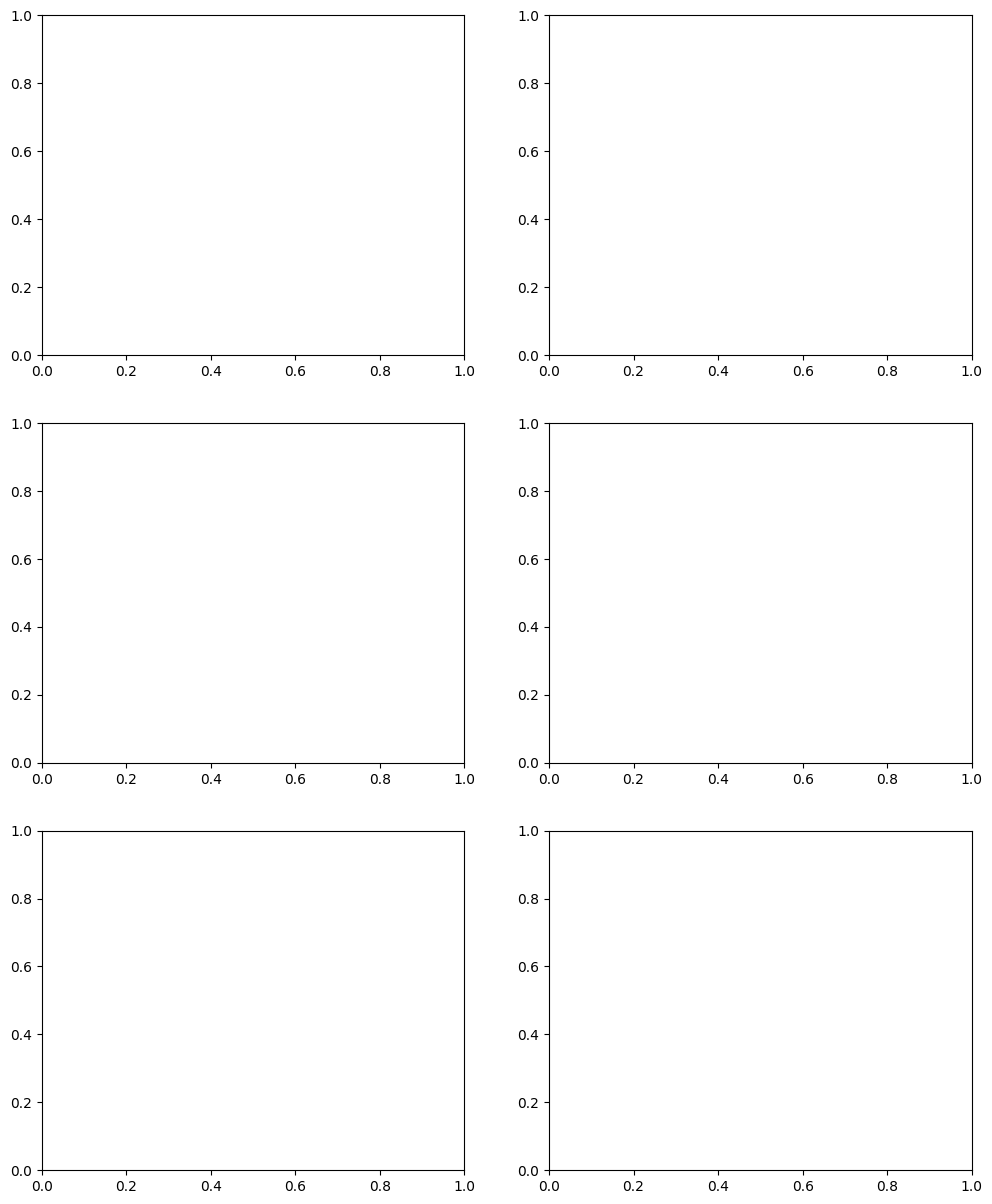

In [91]:
fig, axes = plt.subplots(3, 2, figsize=(12, 5*3))
axes = axes.flatten()


residuals = pred_train - df_train['y_true']
sns.residplot(x=df_train['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[0])
# axes[0].set_ylim(-0.025, 0.04)
axes[0].set_title(f'Train')
axes[0].axhline(0.005, color='red')
axes[0].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_train['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[1])


residuals = pred_val - df_val['y_true']
sns.residplot(x=df_val['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[2])
# axes[2].set_ylim(-0.025, 0.04)
axes[2].set_title(f'Validation')
axes[2].axhline(0.005, color='red')
axes[2].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_val['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[3])


residuals = pred_test - df_test['y_true']
sns.residplot(x=df_test['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[4])
# axes[4].set_ylim(-0.025, 0.04)
axes[4].set_title(f'Test')
axes[4].axhline(0.005, color='red')
axes[4].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_test['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[5])

plt.show()

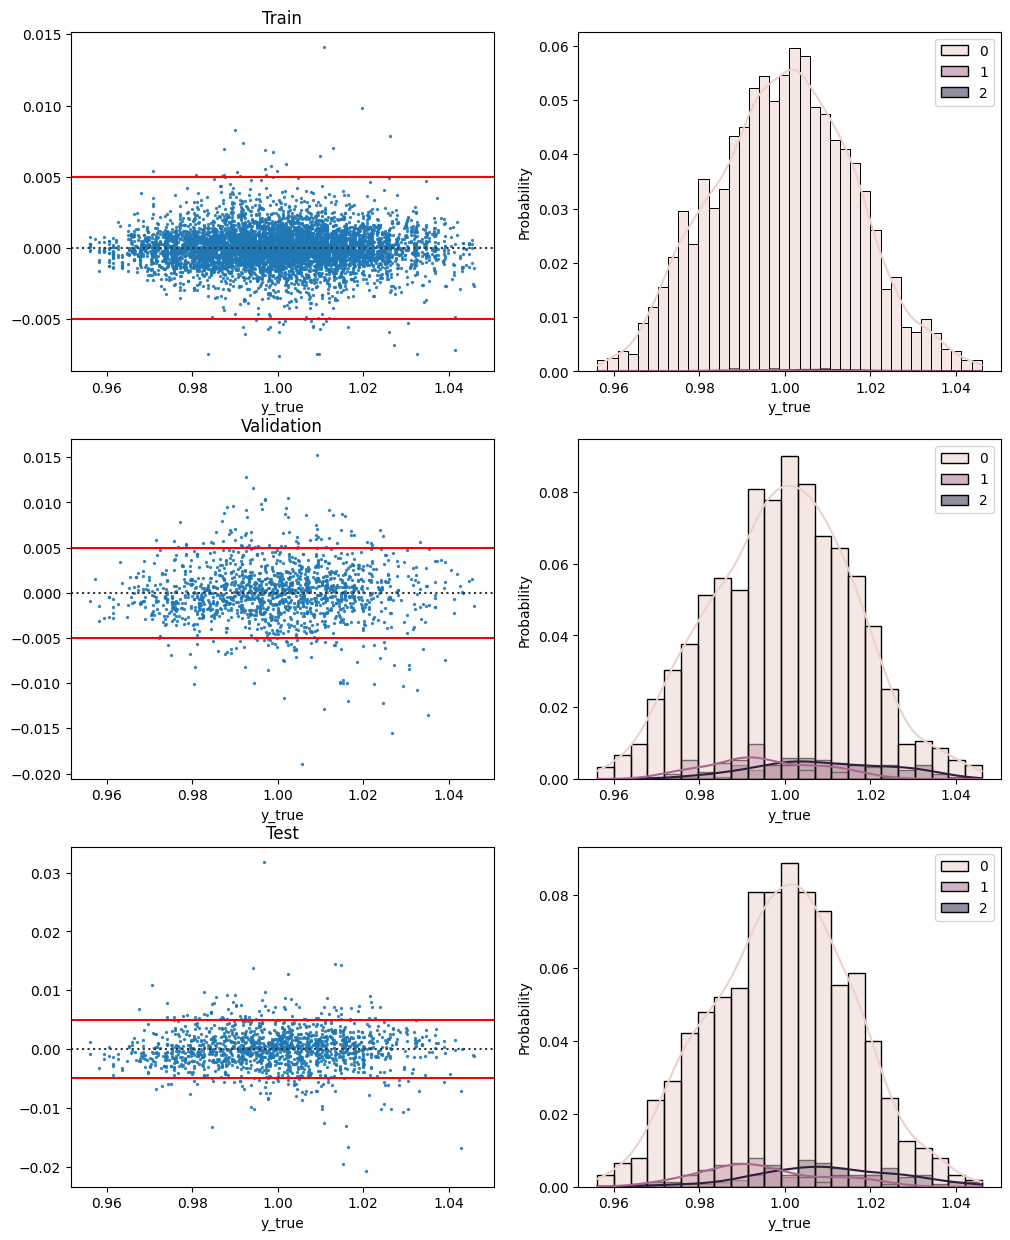

In [100]:
fig, axes = plt.subplots(3, 2, figsize=(12, 5*3))
axes = axes.flatten()


residuals = df_train['y_pred'] - df_train['y_true']
sns.residplot(x=df_train['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[0])
# axes[0].set_ylim(-0.025, 0.04)
axes[0].set_title(f'Train')
axes[0].axhline(0.005, color='red')
axes[0].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_train['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[1])


residuals = df_val['y_pred'] - df_val['y_true']
sns.residplot(x=df_val['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[2])
# axes[2].set_ylim(-0.025, 0.04)
axes[2].set_title(f'Validation')
axes[2].axhline(0.005, color='red')
axes[2].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_val['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[3])


residuals = df_test['y_pred'] - df_test['y_true']
sns.residplot(x=df_test['y_true'], y=residuals, line_kws={"color": "red", "lw": 2}, scatter_kws={'s': 2}, ax=axes[4])
# axes[4].set_ylim(-0.025, 0.04)
axes[4].set_title(f'Test')
axes[4].axhline(0.005, color='red')
axes[4].axhline(-0.005, color='red')

large_residuals = np.where(residuals >= 0.005, 1,
                            np.where(residuals <= -0.005, 2, 0))
sns.histplot(x=df_test['y_true'], hue=large_residuals, kde=True, stat='probability', ax=axes[5])

plt.show()

## Submission 

In [318]:
submission_data_path = '../Submission_template_UHI2025-v2.csv' 
test_file = pd.read_csv(submission_data_path)
test_file

Longitude   Latitude  UHI Index
0    -73.971665  40.788763        NaN
1    -73.971928  40.788875        NaN
2    -73.967080  40.789080        NaN
3    -73.972550  40.789082        NaN
4    -73.969697  40.787953        NaN
...         ...        ...        ...
1035 -73.919388  40.813803        NaN
1036 -73.931033  40.833178        NaN
1037 -73.934647  40.854542        NaN
1038 -73.917223  40.815413        NaN
1039 -73.911645  40.804402        NaN

[1040 rows x 3 columns]

In [319]:
test_data = test_file.copy()

In [320]:
data_folder = "../data_pipeline/data/tabular_data/submission/1x1"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/3x3"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/5x5"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/9x9"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/15x15"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/25x25"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)


data_folder = "../data_pipeline/data/tabular_data/submission/51x51"
for i, filename in tqdm(enumerate(os.listdir(data_folder))):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, 2:]
        # print(df.columns)
        test_data = pd.concat([test_data, df], axis=1)

37it [00:00, 190.70it/s]
73it [00:00, 78.14it/s]
71it [00:01, 51.39it/s]
71it [00:01, 36.75it/s]
63it [00:02, 29.07it/s]
29it [00:01, 20.19it/s]
29it [00:01, 24.44it/s]


In [455]:
pred = rfe_pipeline3.predict(test_data[numerical_cols + categorical_cols])
# pred_lgbm = lgbm_pipeline3.predict(test_data[numerical_cols + categorical_cols])

# pred = p * pred + (1 - p) * pred_lgbm

# pred25 = rfe_pipeline25.predict(test_data[[col for col in df_train.columns if col.endswith("25x25")]])
# res_pred = rfe_pipeline_res.predict(test_data[numerical_cols + categorical_cols])
# pred = pred + res_pred + pred25

final_predictions = pd.Series(pred)
submission_df = pd.DataFrame({'Longitude':test_file['Longitude'].values, 'Latitude':test_file['Latitude'].values, 'UHI Index':final_predictions.values})

In [456]:
submission_df

Longitude   Latitude  UHI Index
0    -73.971665  40.788763   0.963998
1    -73.971928  40.788875   0.963332
2    -73.967080  40.789080   0.963436
3    -73.972550  40.789082   0.966063
4    -73.969697  40.787953   0.959474
...         ...        ...        ...
1035 -73.919388  40.813803   1.042317
1036 -73.931033  40.833178   1.042984
1037 -73.934647  40.854542   1.040866
1038 -73.917223  40.815413   1.038110
1039 -73.911645  40.804402   1.034280

[1040 rows x 3 columns]

In [457]:
submission_df.to_csv("../submissions/xgb_edge_node_surface_v6.csv", index = False)

## Residual Diagnose

In [101]:
all_val = pd.concat([df_val, df_test], axis=0)

In [102]:
import branca.colormap as cm

all_val['lat'] = ground_df['Latitude']
all_val['long'] = ground_df['Longitude']

all_val['residual'] = all_val['y_pred'] - all_val['y_true']
all_val['large_residuals'] = np.where(all_val['residual'] < -0.005, 1, 
                           np.where(all_val['residual'] > 0.005, 2, 0))

# bound = df_val[(df_val['y_true'] >= 0.98) & (df_val['y_true'] <= 1)].copy()




m = folium.Map(location=[40.8, -73.5], zoom_start=7)

colormap = cm.LinearColormap(["green", "yellow", "red"], vmin=all_val['large_residuals'].min(), vmax=all_val['large_residuals'].max())
# Add points
for _, row in all_val.iterrows():

    folium.CircleMarker(
        location=[row["lat"], row["long"]],
        radius=1,
        color=colormap(row['large_residuals']), 
        fill=True,
        fill_opacity=0.7,
        tooltip=_,
    ).add_to(m)

colormap.add_to(m)

m

In [34]:
import branca.colormap as cm

df_test['lat'] = ground_df['Latitude']
df_test['long'] = ground_df['Longitude']

df_test['residual'] = df_test['y_pred'] - df_test['y_true']
# df_val['large_residuals'] = np.where(df_val['residual'] < -0.005, 1, 
#                            np.where(df_val['residual'] > 0.005, 2, 0))

# bound = df_df_testval[(df_test['y_true'] >= 0.98) & (df_df_testval['y_true'] <= 1)].copy()




m = folium.Map(location=[40.8, -73.5], zoom_start=7)

colormap = cm.LinearColormap(["green", "yellow", "red"], vmin=df_test['residual'].min(), vmax=df_test['residual'].max())
# Add points
for _, row in df_test.iterrows():

    folium.CircleMarker(
        location=[row["lat"], row["long"]],
        radius=1,
        color=colormap(row['residual']), 
        fill=True,
        fill_opacity=0.7,
        tooltip=_,
    ).add_to(m)

colormap.add_to(m)

m

In [53]:
all_val.loc[[7172, 7173, 7174, 7175, 7181, 7182, 7188, 7191], :].to_dict()

{'street_orientation_res30': {7172: 2.0,
  7173: 2.0,
  7174: 2.0,
  7175: 2.0,
  7181: 2.0,
  7182: 2.0,
  7188: 2.0,
  7191: 2.0},
 'has_manufacture_res500': {7172: 1.0,
  7173: 1.0,
  7174: 1.0,
  7175: 1.0,
  7181: 1.0,
  7182: 1.0,
  7188: 1.0,
  7191: 1.0},
 'has_park_res500': {7172: 0.0,
  7173: 0.0,
  7174: 0.0,
  7175: 0.0,
  7181: 0.0,
  7182: 0.0,
  7188: 0.0,
  7191: 0.0},
 'has_manufacture_res1000': {7172: 1.0,
  7173: 1.0,
  7174: 1.0,
  7175: 1.0,
  7181: 1.0,
  7182: 1.0,
  7188: 1.0,
  7191: 1.0},
 'has_park_res1000': {7172: 1.0,
  7173: 1.0,
  7174: 1.0,
  7175: 1.0,
  7181: 1.0,
  7182: 1.0,
  7188: 0.0,
  7191: 1.0},
 'building_height_res100': {7172: 35.833,
  7173: 40.83412,
  7174: 40.83412,
  7175: 67.42271,
  7181: 67.42271,
  7182: 67.42271,
  7188: 67.42271,
  7191: 41.776154},
 'building_height_std_res100': {7172: 13.3638935,
  7173: 13.43735,
  7174: 13.43735,
  7175: 21.64944,
  7181: 21.64944,
  7182: 21.64944,
  7188: 21.64944,
  7191: 15.280152},
 'build